In [1]:
import matplotlib.pyplot as plt


In [2]:
#Path to file, may be indegree, outdegree, scc, etc
file_name = "../cc-webgraph/output_dir/cc-main-2020-feb-mar-may-domain.indegree"

In [3]:
x_axis_label = file_name.split(".")[1]
y_axis_label = "Number of PLDs"

In [4]:
frequency = []

with open(file_name) as a_file:
    for line in a_file:
        frequency.append(int(line.strip()))
print("Number of domains processed:", len(frequency))  

Number of domains processed: 21931936


In [5]:
import pandas as pd

df = pd.read_table(file_name, header=None, names=['frequency'])
df

,frequency
0,7543867
1,35301702
2,12272400
3,6886267
4,4433742
...,...
21931931,0
21931932,0
21931933,0
21931934,0


In [6]:
# drop row with index 0 because cannot take log of 0 indegree when plotting x-value using log scale
df = df.iloc[lambda x: x.index != 0]

# also drop all rows where frequency is 0
df = df[df['frequency'] > 0]

df

,frequency
1,35301702
2,12272400
3,6886267
4,4433742
5,3154081
...,...
11351132,1
12037713,1
15844122,1
18359247,1


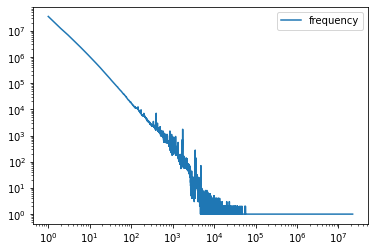

In [7]:
df.plot(loglog=True)

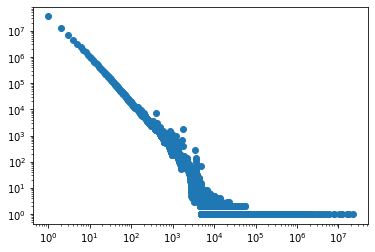

In [8]:
plt.semilogy([1,10,100,1000,10000,100000,1000000], color='white')
plt.semilogx([1,10,100,1000,10000,100000,1000000], color='white')
plt.scatter(df.index, df['frequency'])
plt.show()